In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
energy_df=pd.read_excel('Dataset/Folds5x2_pp.xlsx')[0:5000]
# startup_df=pd.read_csv('Dataset/50_Startups.csv')

In [3]:
energy_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


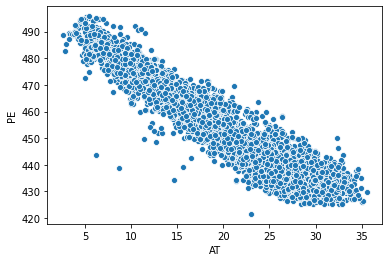

In [5]:
sns.scatterplot(x='AT',y='PE',data=energy_df)

In [6]:
# this normalization is very important , or else the weight will explode
def normalize(X):
    for i in range(0,X.shape[1]):
        X[:,i]=(X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    return X

In [8]:
#Splitting the datasets
from sklearn.model_selection import train_test_split
X = energy_df.iloc[:,[0,1,2]].values 
X_norm=normalize(X)
Y = energy_df.iloc[:,4].values 
X_train,X_test,y_train,y_test=train_test_split(X, Y,test_size=0.2)

In [9]:
class MultiLinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = 2*(1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = 2*(1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated
    


In [10]:
def r2(y_,y):
    sst = np.sum((y-np.array(y).mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

In [11]:
lr=MultiLinearRegression(0.01,500)
lr.fit(X_train,y_train)


In [12]:
y_pred=lr.predict(X_test)


In [13]:
#our prediction is very close to the value
print("Predicted Values",y_pred[0:5])
print("Test Values",list(y_test[0:5]))

Predicted Values [469.62970789 465.93775784 454.78538517 432.094831   422.04585645]
Test Values [474.11, 469.0, 457.17, 433.57, 434.23]


In [14]:
#the r^2 value is good, means the line is a good fit.
print(r2(y_pred,y_test))

0.9140921208812799
